In [1]:
import glob
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
from pyproj import Geod
from sklearn.utils import shuffle


In [2]:
# Load the CSV file
data = pd.read_csv('data_after_calc_distance.csv')

# Save the DataFrame to a CSV file
#data.to_csv('data_after_calc_distance.csv', index=False)

C:\Users\a142105\AppData\Local\Temp\ipykernel_51864\467082502.py:2: DtypeWarning: Columns (10,11,14,20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data_after_calc_distance.csv')


In [12]:
data.head(5)

,# Timestamp,Type of mobile,MMSI,Latitude,Longitude,Navigational status,ROT,SOG,COG,Heading,...,B,C,D,DateTime,DateDiff,dLat/dt,dLong/dt,Latitude_next,Longitude_next,distance
0,2024-01-06 04:48:00,Class A,205011000.0,54.705317,13.307098,Under way using engine,0.0,10.5,261.2,260.0,...,7.0,6.0,6.0,2024-01-06 04:48:57,0.000000,0.000000,0.000000,54.705317,13.307098,99.752498
1,2024-01-06 04:49:00,Class A,205011000.0,54.705317,13.307098,Under way using engine,0.0,10.5,261.2,260.0,...,7.0,6.0,6.0,2024-01-06 04:48:57,0.850000,-0.037906,-0.349482,54.704780,13.302147,253.471012
2,2024-01-06 04:50:00,Class A,205011000.0,54.704780,13.302147,Under way using engine,0.0,10.5,260.0,259.0,...,7.0,6.0,6.0,2024-01-06 04:49:48,1.166667,-0.034611,-0.298646,54.704107,13.296340,335.645988
3,2024-01-06 04:51:00,Class A,205011000.0,54.704107,13.296340,Under way using engine,0.0,10.6,258.4,259.0,...,7.0,6.0,6.0,2024-01-06 04:50:58,1.000000,-0.033120,-0.302280,54.703555,13.291302,294.798221
4,2024-01-06 04:52:00,Class A,205011000.0,54.703555,13.291302,Under way using engine,0.0,10.6,258.5,259.0,...,7.0,6.0,6.0,2024-01-06 04:51:58,1.166667,-0.032760,-0.297874,54.702918,13.285510,299.401661


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3246788 entries, 0 to 3246787
Data columns (total 33 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   # Timestamp                     object 
 1   Type of mobile                  object 
 2   MMSI                            float64
 3   Latitude                        float64
 4   Longitude                       float64
 5   Navigational status             object 
 6   ROT                             float64
 7   SOG                             float64
 8   COG                             float64
 9   Heading                         float64
 10  IMO                             object 
 11  Callsign                        object 
 12  Name                            object 
 13  Ship type                       object 
 14  Cargo type                      object 
 15  Width                           float64
 16  Length                          float64
 17  Type of position fixing dev

In [14]:
data['IMO'].head()

0    9356517
1    9356517
2    9356517
3    9356517
4    9356517
Name: IMO, dtype: object

In [ ]:
"""

1.    Timestamp                         Timestamp from the AIS basestation, format: 31/12/2015 23:59:59 
2.    Type of mobile                    Describes what type of target this message is received from (class A AIS Vessel, Class B AIS vessel, etc)
3.    MMSI                              MMSI number of vessel
4.    Latitude                          Latitude of message report (e.g. 57,8794)
5.    Longitude                         Longitude of message report (e.g. 17,9125)
6.    Navigational status               Navigational status from AIS message if available, e.g.: 'Engaged in fishing', 'Under way using engine', mv.
7.    ROT                               Rot of turn from AIS message if available
8.    SOG                               Speed over ground from AIS message if available
9.    COG                               Course over ground from AIS message if available
10.   Heading                           Heading from AIS message if available
11.   IMO                               IMO number of the vessel
12.   Callsign                          Callsign of the vessel 
13.   Name                              Name of the vessel
14.   Ship type                         Describes the AIS ship type of this vessel 
15.   Cargo type                        Type of cargo from the AIS message 
16.   Width                             Width of the vessel
17.   Length                            Lenght of the vessel 
18.   Type of position fixing device    Type of positional fixing device from the AIS message 
19.   Draught                           Draugth field from AIS message
20.   Destination                       Destination from AIS message
21.   ETA                               Estimated Time of Arrival, if available  
22.   Data source type                  Data source type, e.g. AIS
23.   Size A                            Length from GPS to the bow
24.   Size B                            Length from GPS to the stern
25.   Size C                            Length from GPS to starboard side
26.   Size D                            Length from GPS to port side

"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3246788 entries, 0 to 3246787
Data columns (total 33 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   # Timestamp                     object 
 1   Type of mobile                  object 
 2   MMSI                            float64
 3   Latitude                        float64
 4   Longitude                       float64
 5   Navigational status             object 
 6   ROT                             float64
 7   SOG                             float64
 8   COG                             float64
 9   Heading                         float64
 10  IMO                             object 
 11  Callsign                        object 
 12  Name                            object 
 13  Ship type                       object 
 14  Cargo type                      object 
 15  Width                           float64
 16  Length                          float64
 17  Type of position fixing dev

In [12]:
df = data

In [ ]:
len(df)

In [18]:
data = df

In [3]:
# Statistics - Filter and describe data

data = data[["MMSI", "DateTime", "# Timestamp", "Latitude", "Longitude", "SOG", "Heading", "COG", "Latitude_next" , "Longitude_next", "DateDiff", "dLat/dt", "dLong/dt", "distance"]]
data = data.loc[data['SOG'] != 0]
data = data.dropna()
data = data.drop_duplicates()
data = data.loc[data['DateDiff'] > 0]
data = data.loc[data['DateDiff'] <= 120]
data = data.loc[data['distance'] > 0]
#data = data.loc[data['distance'] <= 800] #Filter rows where distance is greater than 800

In [4]:
len(data)

2054431

In [17]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [18]:
data.head()  # Display the first few rows of the filtered data
data.describe()  # Display summary statistics
data.info()  # Display information about the dataframe
data.shape  # Display the shape of the dataframe

<class 'pandas.core.frame.DataFrame'>
Index: 2054431 entries, 1 to 3246786
Data columns (total 14 columns):
 #   Column          Dtype  
---  ------          -----  
 0   MMSI            float64
 1   DateTime        object 
 2   # Timestamp     object 
 3   Latitude        float64
 4   Longitude       float64
 5   SOG             float64
 6   Heading         float64
 7   COG             float64
 8   Latitude_next   float64
 9   Longitude_next  float64
 10  DateDiff        float64
 11  dLat/dt         float64
 12  dLong/dt        float64
 13  distance        float64
dtypes: float64(12), object(2)
memory usage: 235.1+ MB


(2054431, 14)

In [10]:
import pandas as pd

def corrected_proximity_flag_with_window(df, distance_threshold=0.5, time_window=60):
    """  
    Detects vessels in close proximity within a time window (in seconds).  
    """  
    df['Proximity_Flag'] = 0  # Initialize the flag  
    df['DateTime'] = pd.to_datetime(df['DateTime'])  # Ensure DateTime is in proper datetime format
    df = df.sort_values(by='DateTime')  # Sort data by DateTime for efficiency

    for i, vessel_i in df.iterrows():
        window_start = vessel_i['DateTime'] - pd.Timedelta(seconds=time_window)
        window_end = vessel_i['DateTime'] + pd.Timedelta(seconds=time_window)
        nearby_vessels = df[(df['DateTime'] >= window_start) & 
                            (df['DateTime'] <= window_end) & 
                            (df['MMSI'] != vessel_i['MMSI'])]

        for _, vessel_j in nearby_vessels.iterrows():
            # Use the pre-calculated distance
            if vessel_j['distance'] <= distance_threshold:
                df.at[i, 'Proximity_Flag'] = 1
                df.at[vessel_j.name, 'Proximity_Flag'] = 1

    return df

# Apply the corrected proximity detection
data = corrected_proximity_flag_with_window(data)

KeyboardInterrupt: 

In [97]:
prox = data[data['Alignment_Flag'] == 1]
uniq = prox['MMSI'].unique()
print (f"xxxx:{uniq}")

xxxx:[2.05011000e+08 2.05465000e+08 2.05482000e+08 ... 6.36093241e+08
 6.36093242e+08 6.77015900e+08]


In [94]:

def corrected_alignment_flag_with_window(df, sog_threshold=1, heading_threshold=10, time_window=60):  
    """  
    Detects vessels moving in alignment within a time window (in seconds).  
    """  
    df['Alignment_Flag'] = 0  # Initialize the flag  
    # Ensure DateTime is in proper datetime format  
    df['DateTime'] = pd.to_datetime(df['DateTime'])  
    # Sort data by DateTime for efficiency  
    df = df.sort_values(by='DateTime')  
    for i, vessel_i in df.iterrows():  
        # Define the time window for comparison  
        window_start = vessel_i['DateTime'] - pd.Timedelta(seconds=time_window)  
        window_end = vessel_i['DateTime'] + pd.Timedelta(seconds=time_window)  
        # Compare vessels within the time window  
        nearby_vessels = df[(df['DateTime'] >= window_start) &  
                            (df['DateTime'] <= window_end) &  
                            (df['MMSI'] != vessel_i['MMSI'])]  
        for _, vessel_j in nearby_vessels.iterrows():  
            sog_diff = abs(vessel_i['SOG'] - vessel_j['SOG'])  
            heading_diff = abs(vessel_i['Heading'] - vessel_j['Heading'])  
            if sog_diff <= sog_threshold and heading_diff <= heading_threshold:  
                df.at[i, 'Alignment_Flag'] = 1  
                df.at[vessel_j.name, 'Alignment_Flag'] = 1  
    return df  

# Apply the corrected alignment detection  
data = corrected_alignment_flag_with_window(data) 

In [ ]:
# Define sequence parameters 
seq_input_length = 30
seq_output_length = 20
seq_length = seq_input_length + seq_output_length
window_size = seq_length // 2  # Overlapping sequences

seq = []

# Create sequences with enriched features (Proximity and Alignment Flags)
for i in range(0, len(data) - seq_length + 1, window_size):
    temp = data.iloc[i: i + seq_length].values  # Use all columns, including new flags
    seq.append(temp)

# Transform sequences into 3D array format for modeling
seq = np.dstack(seq)
seq = np.rollaxis(seq, -1)

# Shuffle the sequences for unbiased training
seq = shuffle(seq)

# Save the enriched sequences for model input
np.save("rev_sequences_with_interactions.npy", seq)

print("Sequencing complete. Enriched sequences saved as 'rev_sequences_with_interactions.npy'.")

In [5]:
# Sequencing - Define sequence parameters
seq_input_length = 30
seq_output_length = 20
seq_length = seq_input_length + seq_output_length
window_size = seq_length // 2

In [24]:
seq = []
for i in range(0, len(data) - seq_length + 1, window_size):
    temp = data[i: i + seq_length].values
    
    # Append the sequence without checking the vessel ID condition
    seq.append(temp)
        
# Transformation
seq = np.dstack(seq)
seq = np.rollaxis(seq, -1)

# Mix the data
seq = shuffle(seq)

# Save the sequences to a file
np.save("rev_sequences.npy", seq)

In [10]:
import pickle
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
from pyproj import Proj, Geod
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error
import tensorflow as tf
from keras.models import Sequential, load_model
from keras.layers import Bidirectional, LSTM, Dense, TimeDistributed, Cropping1D
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import Adam
import os
import scipy.stats as stats


In [25]:
# Assuming 'seq' is your array of sequences
# Extract the vessel IDs from the first column of each sequence
vessel_ids = seq[:, :, 0]

# Find the unique vessel IDs across all sequences
unique_vessel_ids = np.unique(vessel_ids)

print(f"Unique vessel IDs across all sequences: {unique_vessel_ids}")

Unique vessel IDs across all sequences: [205011000.0 205465000.0 205482000.0 ... 636093241.0 636093242.0
 677015900.0]


In [6]:
# main sequence variables
seq_input_length = 30
seq_output_length = 20
seq_length = seq_input_length+seq_output_length

# seq = np.load("rev_sequences.npy", allow_pickle=True)
seq = np.load("rev_sequences.npy", allow_pickle=True)
seq = seq.reshape(seq.shape[0]*seq.shape[1], seq.shape[2])
#seq = seq[:,3:] 

In [27]:
df_seq = pd.DataFrame(seq[0])
# Display the head of the DataFrame to see the features
print(df_seq.head(14))

                      0
0           246394000.0
1   2024-01-06 15:04:05
2   2024-01-06 15:04:00
3             54.828037
4             12.823658
5                   9.2
6                 251.0
7                 251.7
8             54.827223
9             12.819462
10                  1.0
11             -0.04884
12             -0.25176
13           282.990905


In [ ]:
"""data[["MMSI", "DateTime", "# Timestamp", "Latitude", "Longitude", "SOG", "Heading", "COG", "Latitude_next" , "Longitude_next", "DateDiff", "dLat/dt", "dLong/dt", "distance"]]"""

In [7]:
# Select all features for input (X) except dLat/dt and dLong/dt
X_seq = seq[:, [3, 4, 5, 6, 10, 13]]  # All features for input except dLat/dt and dLong/dt
# Select only dLat/dt and dLong/dt for target (y)
y_seq = seq[:, [11, 12]]  # Features for target (dLat/dt, dLong/dt)

In [8]:
# Print shapes to verify
print(f"Shape of X_seq: {X_seq.shape}")
print(f"Shape of y_seq: {y_seq.shape}")

Shape of X_seq: (4108800, 6)
Shape of y_seq: (4108800, 2)


In [11]:
# Train the normalization for input features (X)
scaler_X = MinMaxScaler(feature_range=(0, 1))
scaler_X = scaler_X.fit(X_seq)

# Normalize the input features (X)
X_seq = scaler_X.transform(X_seq)

# Train the normalization for target features (y)
scaler_y = MinMaxScaler(feature_range=(0, 1))
scaler_y = scaler_y.fit(y_seq)

# Normalize the target features (y)
y_seq = scaler_y.transform(y_seq)

In [12]:
# Reshape back to sequence format
X_seq = X_seq.reshape(seq.shape[0] // seq_length, seq_length, X_seq.shape[1])
y_seq = y_seq.reshape(seq.shape[0] // seq_length, seq_length, y_seq.shape[1])

X = X_seq[:,0:seq_input_length,:]
y = y_seq[:,seq_input_length:seq_length,:]

# save/load scalers
pickle.dump(scaler_X, open("rev_scaler_X.pkl", "wb"))
pickle.dump(scaler_y, open("rev_scaler_y.pkl", "wb"))

In [13]:
# split train and test data by 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.50)   # 70 : 15 : 15


# save preprocessed data
np.save("rev_X_train.npy", X_train)
np.save("rev_X_test.npy", X_test)
np.save("rev_X_val.npy", X_val)
np.save("rev_y_train.npy", y_train)
np.save("rev_y_test.npy", y_test)
np.save("rev_y_val.npy", y_val)

In [14]:
# Load the new files to verify
rev_X_train = np.load("rev_X_train.npy")
rev_X_val = np.load("rev_X_val.npy")
rev_X_test = np.load("rev_X_test.npy")
rev_y_train = np.load("rev_y_train.npy")
rev_y_val = np.load("rev_y_val.npy")
rev_y_test = np.load("rev_y_test.npy")

# Print shapes to verify
print(f"rev_X_train shape: {rev_X_train.shape}")  
print(f"rev_X_val shape: {rev_X_val.shape}") 
print(f"rev_X_test shape: {rev_X_test.shape}")  
print(f"rev_y_train shape: {rev_y_train.shape}")  
print(f"rev_y_val shape: {rev_y_val.shape}") 
print(f"rev_y_test shape: {rev_y_test.shape}")

rev_X_train shape: (57523, 30, 6)
rev_X_val shape: (12327, 30, 6)
rev_X_test shape: (12326, 30, 6)
rev_y_train shape: (57523, 20, 2)
rev_y_val shape: (12327, 20, 2)
rev_y_test shape: (12326, 20, 2)


In [ ]:
""" 

# Define hyperparameter grid for Grid Search
#grid = {
#    'lstm_units_1': [64, 128],
#    'lstm_units_2': [32, 64],
#    'batch_size': [16, 32],
 #   'learning_rate': [0.001, 0.005],
 #   'epochs': [50, 100]
#}


grid = {
    'lstm_units_1': [64],  # Reduced to 1 option
    'lstm_units_2': [32, 64],  # 2 options
    'batch_size': [16, 32],  # Reduced to 1 option
    'learning_rate': [0.001],  # 2 options
    'epochs': [50, 100]  # 2 options
}


param_grid = ParameterGrid(grid)

# Create a directory to save models 
if not os.path.exists('rev_models'):
    os.makedirs('rev_models')

param_dict = {}

# Loop over each hyperparameter combination
for idx, params in enumerate(param_grid):
    param_dict[idx+1] = params

    print(f"Training model {idx + 1}/{len(param_grid)} with parameters: {params}")
    
    #BiLSTM model
    model = Sequential()
    model.add(Bidirectional(LSTM(params['lstm_units_1'], return_sequences=True), input_shape=(rev_X_train.shape[1], rev_X_train.shape[2])))
    model.add(Bidirectional(LSTM(params['lstm_units_2'], return_sequences=True)))
    model.add(Cropping1D(cropping=(rev_X_train.shape[1] - rev_y_train.shape[1], 0)))  # Crop to match y's time steps
    model.add(TimeDistributed(Dense(2)))  # Output layer with 2 units (for dLat and dLong) applied at each time step
    
    # Compile the model
    optimizer = Adam(learning_rate=params['learning_rate'])
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
    
    # Callbacks
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    model_checkpoint = ModelCheckpoint(f'rev_models/rev_model_{idx + 1}.keras', save_best_only=True, monitor='val_loss', mode='min')
    
    # Train the model
    history = model.fit(
        rev_X_train, rev_y_train,
        epochs=params['epochs'],
        batch_size=params['batch_size'],
        validation_data=(rev_X_val, rev_y_val),
        verbose=1,
        callbacks=[early_stopping, model_checkpoint]
    )
    
    # Save the final model
    model.save(f'rev_models/rev_final_model_{idx + 1}.keras')

    """

Training model 1/8 with parameters: {'batch_size': 16, 'epochs': 50, 'learning_rate': 0.001, 'lstm_units_1': 64, 'lstm_units_2': 32}
Epoch 1/50


c:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3596/3596 ━━━━━━━━━━━━━━━━━━━━ 92s 22ms/step - loss: 1.2753e-04 - mae: 0.0035 - val_loss: 9.5101e-07 - val_mae: 7.6712e-04
Epoch 2/50
3596/3596 ━━━━━━━━━━━━━━━━━━━━ 75s 21ms/step - loss: 1.4378e-06 - mae: 6.9851e-04 - val_loss: 1.3840e-07 - val_mae: 2.1072e-04
Epoch 3/50
3596/3596 ━━━━━━━━━━━━━━━━━━━━ 74s 20ms/step - loss: 8.8044e-07 - mae: 4.2082e-04 - val_loss: 8.5717e-08 - val_mae: 9.0633e-05
Epoch 4/50
3596/3596 ━━━━━━━━━━━━━━━━━━━━ 71s 20ms/step - loss: 3.1374e-07 - mae: 3.0721e-04 - val_loss: 7.7275e-08 - val_mae: 5.9187e-05
Epoch 5/50
3596/3596 ━━━━━━━━━━━━━━━━━━━━ 73s 20ms/step - loss: 8.4721e-08 - mae: 1.7376e-04 - val_loss: 1.1272e-07 - val_mae: 1.7444e-04
Epoch 6/50
3596/3596 ━━━━━━━━━━━━━━━━━━━━ 75s 21ms/step - loss: 6.6995e-08 - mae: 1.5139e-04 - val_loss: 2.3475e-07 - val_mae: 2.9190e-04
Epoch 7/50
3596/3596 ━━━━━━━━━━━━━━━━━━━━ 73s 20ms/step - loss: 2.6335e-08 - mae: 9.4969e-05 - val_loss: 1.1408e-07 - val_mae: 1.6735e-04
Epoch 8/50
3596/3596 ━━━━━━━━━━━━━━━━━━━━ 73s 20m

In [35]:
from sklearn.model_selection import ParameterGrid
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, TimeDistributed, Cropping1D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import os
import pickle

# Hyperparameter grid
grid = {
    'lstm_units_1': [128, 256],
    'lstm_units_2': [64, 128],
    'batch_size': [32, 64],
    'learning_rate': [0.001, 0.0005],
    'epochs': [50, 100]
}

param_grid = ParameterGrid(grid)

# Ensure model directory exists
if not os.path.exists('rev_models'):
    os.makedirs('rev_models')

param_dict = {}

# Training loop with resume logic
for idx, params in enumerate(param_grid):
    model_path = f'rev_models/rev_model_{idx + 1}.keras'
    
    if os.path.exists(model_path):
        print(f"Model {idx + 1} already exists. Skipping training.")
        continue

    print(f"\nTraining model {idx + 1}/{len(param_grid)} with parameters: {params}\n")

    # BiLSTM Model
    model = Sequential()
    model.add(Bidirectional(LSTM(params['lstm_units_1'], return_sequences=True), input_shape=(rev_X_train.shape[1], rev_X_train.shape[2])))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    model.add(Bidirectional(LSTM(params['lstm_units_2'], return_sequences=True)))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    model.add(Cropping1D(cropping=(rev_X_train.shape[1] - rev_y_train.shape[1], 0)))
    model.add(TimeDistributed(Dense(2)))

    # Compile the model
    optimizer = Adam(learning_rate=params['learning_rate'], clipnorm=1.0)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

    # Callbacks
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    model_checkpoint = ModelCheckpoint(model_path, save_best_only=True, monitor='val_loss', mode='min')
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1)

    # Train the model
    model.fit(
        rev_X_train, rev_y_train,
        epochs=params['epochs'],
        batch_size=params['batch_size'],
        validation_data=(rev_X_val, rev_y_val),
        verbose=1,
        callbacks=[early_stopping, model_checkpoint, reduce_lr]
    )

    model.save(f'rev_models/rev_final_model_{idx + 1}.keras')



Training model 1/32 with parameters: {'batch_size': 32, 'epochs': 50, 'learning_rate': 0.001, 'lstm_units_1': 128, 'lstm_units_2': 64}



c:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1798/1798 ━━━━━━━━━━━━━━━━━━━━ 122s 62ms/step - loss: 0.1315 - mae: 0.1521 - val_loss: 2.1649e-06 - val_mae: 0.0010 - learning_rate: 0.0010
Epoch 2/50
1798/1798 ━━━━━━━━━━━━━━━━━━━━ 129s 72ms/step - loss: 7.2101e-04 - mae: 0.0204 - val_loss: 6.5308e-07 - val_mae: 6.6497e-04 - learning_rate: 0.0010
Epoch 3/50
1798/1798 ━━━━━━━━━━━━━━━━━━━━ 152s 85ms/step - loss: 1.1360e-04 - mae: 0.0080 - val_loss: 7.5199e-08 - val_mae: 1.8118e-04 - learning_rate: 0.0010
Epoch 4/50
1798/1798 ━━━━━━━━━━━━━━━━━━━━ 154s 86ms/step - loss: 9.9342e-06 - mae: 0.0024 - val_loss: 1.5391e-07 - val_mae: 3.1168e-04 - learning_rate: 0.0010
Epoch 5/50
1798/1798 ━━━━━━━━━━━━━━━━━━━━ 154s 86ms/step - loss: 7.6718e-07 - mae: 6.5175e-04 - val_loss: 2.2488e-08 - val_mae: 6.6720e-05 - learning_rate: 0.0010
Epoch 6/50
1798/1798 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 3.8112e-06 - mae: 5.8685e-04
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
1798/1798 ━━━━━━━━━━━━━━━━━━━━ 143s 80ms/

KeyboardInterrupt: 

In [41]:

from tensorflow.keras.models import load_model
from sklearn.metrics import mean_squared_error
import numpy as np
import pickle
import os

print("\n--- Evaluating All Models (All Metrics, Selection by RMSE) ---\n")

# Load existing evaluation results if available
eval_results_path = 'rev_models/evaluation_results.pkl'
if os.path.exists(eval_results_path):
    with open(eval_results_path, 'rb') as file:
        evaluation_results = pickle.load(file)
else:
    evaluation_results = {}

# Evaluate only existing models
for idx in range(1, len(param_grid) + 1):
    model_key = f'Model_{idx}'
    model_path = f'rev_models/rev_model_{idx}.keras'

    # Skip already evaluated models
    if model_key in evaluation_results:
        print(f"{model_key} already evaluated. Skipping.")
        continue

    # Check if the model file exists before loading
    if not os.path.exists(model_path):
        print(f"{model_key} not found. Skipping.")
        continue

    # Load and evaluate the model
    model = load_model(model_path)
    val_loss, val_mae = model.evaluate(rev_X_val, rev_y_val, verbose=0)
    predictions = model.predict(rev_X_val)
    rmse = np.sqrt(mean_squared_error(rev_y_val.reshape(-1, 2), predictions.reshape(-1, 2)))

    # Store evaluation metrics
    evaluation_results[model_key] = {
        'Val_Loss': val_loss,
        'Val_MAE': val_mae,
        'RMSE': rmse
    }

# Save updated results
with open(eval_results_path, 'wb') as file:
    pickle.dump(evaluation_results, file)

# Print all model metrics
print("\n--- All Model Metrics ---\n")
for model_key, metrics in evaluation_results.items():
    print(f"{model_key} | Val_Loss: {metrics['Val_Loss']:.6f} | MAE: {metrics['Val_MAE']:.6f} | RMSE: {metrics['RMSE']:.6f}")

# Select the best model based on RMSE
best_model_key = min(evaluation_results, key=lambda x: evaluation_results[x]['RMSE'])
print(f"\nBest Model Based on RMSE: {best_model_key}")



--- Evaluating All Models (All Metrics, Selection by RMSE) ---

386/386 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step
386/386 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step
386/386 ━━━━━━━━━━━━━━━━━━━━ 23s 57ms/step
386/386 ━━━━━━━━━━━━━━━━━━━━ 27s 67ms/step
386/386 ━━━━━━━━━━━━━━━━━━━━ 13s 33ms/step
386/386 ━━━━━━━━━━━━━━━━━━━━ 20s 50ms/step
386/386 ━━━━━━━━━━━━━━━━━━━━ 25s 62ms/step
386/386 ━━━━━━━━━━━━━━━━━━━━ 33s 83ms/step
386/386 ━━━━━━━━━━━━━━━━━━━━ 18s 43ms/step
386/386 ━━━━━━━━━━━━━━━━━━━━ 24s 61ms/step
386/386 ━━━━━━━━━━━━━━━━━━━━ 31s 78ms/step
386/386 ━━━━━━━━━━━━━━━━━━━━ 37s 93ms/step
386/386 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step
386/386 ━━━━━━━━━━━━━━━━━━━━ 17s 42ms/step
386/386 ━━━━━━━━━━━━━━━━━━━━ 21s 51ms/step
386/386 ━━━━━━━━━━━━━━━━━━━━ 24s 60ms/step
386/386 ━━━━━━━━━━━━━━━━━━━━ 14s 33ms/step
386/386 ━━━━━━━━━━━━━━━━━━━━ 19s 48ms/step
Model_19 not found. Skipping.
Model_20 not found. Skipping.
Model_21 not found. Skipping.
Model_22 not found. Skipping.
Model_23 not found. Skipping.
Model_24 no

In [43]:
# �� Evaluation: Combined Metric (RMSE, MAE, Val_Loss)

print("\n--- Evaluating All Models (Combined Metric) ---\n")

# Weights for the combined metric
alpha, beta, gamma = 0.5, 0.3, 0.2

# Compute combined score
for model_key, metrics in evaluation_results.items():
    combined_score = (alpha * metrics['RMSE']) + (beta * metrics['Val_MAE']) + (gamma * metrics['Val_Loss'])
    evaluation_results[model_key]['Combined_Score'] = combined_score

# Print all combined scores
print("\n--- All Model Combined Scores ---\n")
for model_key, metrics in evaluation_results.items():
    print(f"{model_key} | Combined Score: {metrics['Combined_Score']:.6f}")

# Select the best model based on the combined score
best_model_key = min(evaluation_results, key=lambda x: evaluation_results[x]['Combined_Score'])
print(f"\nBest Model Based on Combined Metric: {best_model_key}")


--- Evaluating All Models (Combined Metric) ---


--- All Model Combined Scores ---

Model_1 | Combined Score: 0.000078
Model_2 | Combined Score: 0.000074
Model_3 | Combined Score: 0.000081
Model_4 | Combined Score: 0.000078
Model_5 | Combined Score: 0.000077
Model_6 | Combined Score: 0.000076
Model_7 | Combined Score: 0.000078
Model_8 | Combined Score: 0.000078
Model_9 | Combined Score: 0.000077
Model_10 | Combined Score: 0.000078
Model_11 | Combined Score: 0.000075
Model_12 | Combined Score: 0.000076
Model_13 | Combined Score: 0.000077
Model_14 | Combined Score: 0.000076
Model_15 | Combined Score: 0.000078
Model_16 | Combined Score: 0.000078
Model_17 | Combined Score: 0.000077
Model_18 | Combined Score: 0.000272

Best Model Based on Combined Metric: Model_2


In [15]:
X_test = np.load("rev_X_test.npy")
y_test = np.load("rev_y_test.npy")

In [16]:
X_test.shape

(12326, 30, 6)

In [17]:
y_test.shape

(12326, 20, 2)

In [48]:

from tensorflow.keras.models import load_model
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Initialize a dictionary to store predictions and inverse-transformed data
predictions = {}

# Loop over the evaluated models
for model_key, model_metrics in evaluation_results.items():
    model_path = f'rev_models/{model_key.replace("Model_", "rev_model_")}.keras'
    
    # Check if the model exists before loading
    if not os.path.exists(model_path):
        print(f"{model_key} not found. Skipping.")
        continue

    # Load the model
    model = load_model(model_path)
    
    # Predict on the test set
    rev_y_pred = model.predict(rev_X_test)

    # Reshape and inverse transform predictions
    y_test_flat = rev_y_test.reshape(-1, 2)
    y_pred_flat = rev_y_pred.reshape(-1, 2)
    y_test_inv = rev_scaler_y.inverse_transform(y_test_flat)
    y_pred_inv = rev_scaler_y.inverse_transform(y_pred_flat)

    # Store predictions
    predictions[model_key] = {
        'y_test_inv': y_test_inv,
        'y_pred_inv': y_pred_inv
    }

print("Predictions have been reshaped, inverse transformed, and stored.")





386/386 ━━━━━━━━━━━━━━━━━━━━ 15s 38ms/step
386/386 ━━━━━━━━━━━━━━━━━━━━ 18s 44ms/step
386/386 ━━━━━━━━━━━━━━━━━━━━ 23s 55ms/step
386/386 ━━━━━━━━━━━━━━━━━━━━ 26s 66ms/step
386/386 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step
386/386 ━━━━━━━━━━━━━━━━━━━━ 18s 46ms/step
386/386 ━━━━━━━━━━━━━━━━━━━━ 26s 56ms/step
386/386 ━━━━━━━━━━━━━━━━━━━━ 27s 67ms/step
386/386 ━━━━━━━━━━━━━━━━━━━━ 13s 32ms/step
386/386 ━━━━━━━━━━━━━━━━━━━━ 21s 51ms/step
386/386 ━━━━━━━━━━━━━━━━━━━━ 23s 56ms/step
386/386 ━━━━━━━━━━━━━━━━━━━━ 27s 67ms/step
386/386 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step
386/386 ━━━━━━━━━━━━━━━━━━━━ 24s 59ms/step
386/386 ━━━━━━━━━━━━━━━━━━━━ 27s 66ms/step
386/386 ━━━━━━━━━━━━━━━━━━━━ 33s 82ms/step
386/386 ━━━━━━━━━━━━━━━━━━━━ 18s 46ms/step
386/386 ━━━━━━━━━━━━━━━━━━━━ 27s 67ms/step
Predictions have been reshaped, inverse transformed, and stored.


In [82]:
predictions

{'Model_1': {'y_test_inv': array([[0.15951724, 0.26602759],
         [0.12930968, 0.30774194],
         [0.12018   , 0.3219    ],
         ...,
         [0.12882   , 0.2106    ],
         [0.129     , 0.2097    ],
         [0.1278    , 0.21162   ]]),
  'y_pred_inv': array([[ 0.03930968,  0.02129837],
         [ 0.01522884, -0.03083277],
         [ 0.00791591, -0.05034848],
         ...,
         [ 0.01032399,  0.11890122],
         [ 0.01586327,  0.12407538],
         [ 0.0247111 ,  0.11388533]], dtype=float32)},
 'Model_2': {'y_test_inv': array([[0.15951724, 0.26602759],
         [0.12930968, 0.30774194],
         [0.12018   , 0.3219    ],
         ...,
         [0.12882   , 0.2106    ],
         [0.129     , 0.2097    ],
         [0.1278    , 0.21162   ]]),
  'y_pred_inv': array([[0.04780279, 0.1823181 ],
         [0.04844403, 0.17455079],
         [0.0491535 , 0.1690114 ],
         ...,
         [0.0462406 , 0.11898644],
         [0.03620578, 0.09153298],
         [0.0173777 , 0.039

In [189]:
metrics['Val_Loss']

1.431638168014615e-07

In [190]:
# Evaluation: Combined Metric (RMSE, MAE, Val_Loss)

print("\n--- Evaluating All Models (Combined Metric) ---\n")

# Weights for the combined metric
alpha, beta, gamma = 0.5, 0.3, 0.2

# Compute combined score
for model_key, metrics in evaluation_results.items():
    combined_score = (alpha * metrics['RMSE']) + (beta * metrics['Val_MAE']) + (gamma * metrics['Val_Loss'])
    evaluation_results[model_key]['Combined_Score'] = combined_score

# Print all combined scores with MAE and RMSE
print("\n--- All Model Combined Scores ---\n")
for model_key, metrics in evaluation_results.items():
    print(f"{model_key} | Loss: {metrics['Val_Loss']:.6f} | MAE: {metrics['Val_MAE']:.6f} | RMSE: {metrics['RMSE']:.6f} | Combined Score: {metrics['Combined_Score']:.6f}")

# Select the best model based on the combined score
best_model_key = min(evaluation_results, key=lambda x: evaluation_results[x]['Combined_Score'])
print(f"\nBest Model Based on Combined Metric: {best_model_key}")



--- Evaluating All Models (Combined Metric) ---


--- All Model Combined Scores ---

Model_1 | Loss: 0.000000 | MAE: 0.000038 | RMSE: 0.000133 | Combined Score: 0.000078
Model_2 | Loss: 0.000000 | MAE: 0.000031 | RMSE: 0.000131 | Combined Score: 0.000074
Model_3 | Loss: 0.000000 | MAE: 0.000045 | RMSE: 0.000136 | Combined Score: 0.000081
Model_4 | Loss: 0.000000 | MAE: 0.000038 | RMSE: 0.000133 | Combined Score: 0.000078
Model_5 | Loss: 0.000000 | MAE: 0.000036 | RMSE: 0.000133 | Combined Score: 0.000077
Model_6 | Loss: 0.000000 | MAE: 0.000035 | RMSE: 0.000132 | Combined Score: 0.000076
Model_7 | Loss: 0.000000 | MAE: 0.000037 | RMSE: 0.000133 | Combined Score: 0.000078
Model_8 | Loss: 0.000000 | MAE: 0.000037 | RMSE: 0.000133 | Combined Score: 0.000078
Model_9 | Loss: 0.000000 | MAE: 0.000036 | RMSE: 0.000132 | Combined Score: 0.000077
Model_10 | Loss: 0.000000 | MAE: 0.000037 | RMSE: 0.000133 | Combined Score: 0.000078
Model_11 | Loss: 0.000000 | MAE: 0.000032 | RMSE: 0.000131 | Co

In [79]:
import os

# Check the model directory for existing files
model_files = [file for file in os.listdir('rev_models') if file.endswith('.keras')]

print(f"Models found in 'rev_models': {model_files}")


Models found in 'rev_models': ['rev_final_model_1.keras', 'rev_final_model_10.keras', 'rev_final_model_11.keras', 'rev_final_model_12.keras', 'rev_final_model_13.keras', 'rev_final_model_14.keras', 'rev_final_model_15.keras', 'rev_final_model_16.keras', 'rev_final_model_17.keras', 'rev_final_model_2.keras', 'rev_final_model_3.keras', 'rev_final_model_4.keras', 'rev_final_model_5.keras', 'rev_final_model_6.keras', 'rev_final_model_7.keras', 'rev_final_model_8.keras', 'rev_final_model_9.keras', 'rev_model_1.keras', 'rev_model_10.keras', 'rev_model_11.keras', 'rev_model_12.keras', 'rev_model_13.keras', 'rev_model_14.keras', 'rev_model_15.keras', 'rev_model_16.keras', 'rev_model_17.keras', 'rev_model_18.keras', 'rev_model_2.keras', 'rev_model_3.keras', 'rev_model_4.keras', 'rev_model_5.keras', 'rev_model_6.keras', 'rev_model_7.keras', 'rev_model_8.keras', 'rev_model_9.keras']


In [85]:
# Corrected predictions dictionary with integer keys
corrected_predictions = {int(key.split('_')[1]): value for key, value in predictions.items()}

# Display the corrected predictions dictionary
corrected_predictions

{1: {'y_test_inv': array([[0.15951724, 0.26602759],
         [0.12930968, 0.30774194],
         [0.12018   , 0.3219    ],
         ...,
         [0.12882   , 0.2106    ],
         [0.129     , 0.2097    ],
         [0.1278    , 0.21162   ]]),
  'y_pred_inv': array([[ 0.03930968,  0.02129837],
         [ 0.01522884, -0.03083277],
         [ 0.00791591, -0.05034848],
         ...,
         [ 0.01032399,  0.11890122],
         [ 0.01586327,  0.12407538],
         [ 0.0247111 ,  0.11388533]], dtype=float32)},
 2: {'y_test_inv': array([[0.15951724, 0.26602759],
         [0.12930968, 0.30774194],
         [0.12018   , 0.3219    ],
         ...,
         [0.12882   , 0.2106    ],
         [0.129     , 0.2097    ],
         [0.1278    , 0.21162   ]]),
  'y_pred_inv': array([[0.04780279, 0.1823181 ],
         [0.04844403, 0.17455079],
         [0.0491535 , 0.1690114 ],
         ...,
         [0.0462406 , 0.11898644],
         [0.03620578, 0.09153298],
         [0.0173777 , 0.03935313]], dtype=f

In [86]:
predictions = corrected_predictions

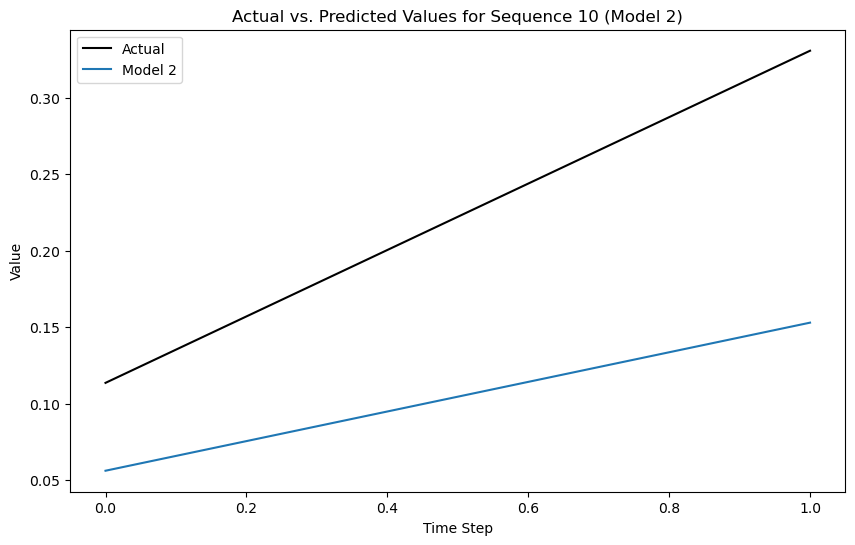

In [92]:
import matplotlib.pyplot as plt

def plot_sequence_for_model(model_index, sequence_index=0):
    # Check if the model_index exists in predictions
    if model_index in predictions:
        y_test_inv = predictions[model_index]['y_test_inv']
        y_pred_inv = predictions[model_index]['y_pred_inv']

        # Plot actual values
        plt.figure(figsize=(10, 6))
        plt.plot(y_test_inv[sequence_index], label='Actual', color='black')

        # Plot predicted values for the selected model
        plt.plot(y_pred_inv[sequence_index], label=f'Model {model_index}')

        plt.xlabel('Time Step')
        plt.ylabel('Value')
        plt.title(f'Actual vs. Predicted Values for Sequence {sequence_index} (Model {model_index})')
        plt.legend()
        plt.show()
    else:
        print(f"Model index {model_index} not found in predictions.")

# Example usage: Plot sequence 0 for model 1
plot_sequence_for_model(model_index=2, sequence_index=10)

#### HAVERSINE

In [93]:
class MAEH_Extension:
    
    p, geon = None, None # variables for cartographic transformations
    
    def __init__(self):
        self.p = Proj (
            proj="utm",
            zone=33,
            ellps="WGS84",
            south=True
        )    
        self.geod = Geod(ellps='WGS84', proj="utm", zone=33)
        
        
    def haversine_distance(lat1, lon1, lat2, lon2, units):
        if(units == 'k'):
            r = 6371 # Radius of earth in kilometers
        elif(units == 'm'):
            r = 6371000 # Radius of earth in meters
        else:
            r = 3956 # Radius of earth in miles            
        phi1 = np.radians(lat1)
        phi2 = np.radians(lat2)
        delta_phi = np.radians(lat2 - lat1)
        delta_lambda = np.radians(lon2 - lon1)
        a = np.sin(delta_phi / 2)**2 + np.cos(phi1) * np.cos(phi2) *   np.sin(delta_lambda / 2)**2
        res = r * (2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a)))
        return np.round(res, 2)
    
    def true_and_predicted_distance(self, y, yhat, units):
        # calculate distance between true and predicted points
        if(y.ndim == 2):
            y = y.reshape(1, y.shape[0], y.shape[1])
        if(yhat.ndim == 2):
            yhat = yhat.reshape(1, yhat.shape[0], yhat.shape[1])
        dist = self.haversine_distance(y[:,:,0], y[:,:,1], yhat[:,:,0], yhat[:,:,1], units)
        return np.average(abs(dist)), dist
    
maehClassInst = MAEH_Extension

In [ ]:
import glob
import os
import re
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model

# Initialize a dictionary to store the loaded models and their specs
loaded_models = {}

# Load all saved models and predict on the test set
model_paths = glob.glob('rev_models/rev_model_*.keras')
all_mape_results = []

modelSeq = {}

for model_path in model_paths:
    print(f"\n\nLoading model from {model_path}")
    
    # Extract model index from the path using regex
    base_name = os.path.basename(model_path)
    print(f"Base name: {base_name}")
    
    match = re.search(r'rev_model_(\d+)\.keras', base_name)
    if match:
        model_index = int(match.group(1))
        print(f"Model index: {model_index}")
        #print(f"Model Specs: {rev_loaded_param_dict[model_index]}")
        
        # Load the model and store it in the dictionary
        model = load_model(model_path)
        loaded_models[model_index] = model
        
        # Predict on the test set
        y_pred = model.predict(rev_X_test)

        # Perform inverse transformation on y_test and y_pred without flattening
        y_test_inv = np.zeros_like(rev_y_test)
        y_pred_inv = np.zeros_like(y_pred)

        # Inverse transform each sequence individually
        for i in range(rev_y_test.shape[0]):  # Loop over all sequences
            y_test_inv[i] = rev_scaler_y.inverse_transform(rev_y_test[i])
            y_pred_inv[i] = rev_scaler_y.inverse_transform(y_pred[i])

        # Calculate the Haversine distance for each sequence
        maeh_distances = []
        y_pred_inv_list = []

        for i in range(y_test_inv.shape[0]):  # Loop over all sequences
            avg_dist, dist_array = maehClassInst.true_and_predicted_distance(maehClassInst, y_test_inv[i], y_pred_inv[i], 'k')
            maeh_distances.append(avg_dist)
            y_pred_inv_list.append(y_pred_inv[i])

        # Convert maeh_distances to numpy array for further analysis if needed
        maeh_distances = np.array(maeh_distances)
        modelSeq[model_path] = y_pred_inv_list

        # Calculate overall average Haversine distance
        overall_avg_distance = np.mean(maeh_distances)
        
        # Print or analyze distances for each sequence
        print(f"Average Haversine distance for each sequence (in km): {maeh_distances}")
        print(f"Overall Average Haversine Distance (in km): {overall_avg_distance}")
        
        # Append the result to the all_mape_results list
        all_mape_results.append({'Model Index': model_index, 'Overall Average Haversine Distance (km)': overall_avg_distance})
    else:
        print(f"Unexpected file name format: {base_name}")

# Create a DataFrame from the results
df_s_haversine = pd.DataFrame(all_mape_results)

# Save the DataFrame to a CSV file
df_s_haversine.to_csv('rev_overall_average_haversine_distances.csv', index=False)

print("new_Overall averages have been saved to rev_overall_average_haversine_distances.csv.")


In [97]:

# Correct extraction of MMSI from the test set
unique_vessels = np.unique(rev_X_test[:, 0, 0])  # Assuming MMSI is the first feature in the sequence

print(f"Unique Vessel MMSIs found in the test set: {unique_vessels}")


Unique Vessel MMSIs found in the test set: [0.00327113 0.00456868 0.00611024 ... 0.99984499 0.9999335  0.9999435 ]


In [81]:
import glob
import os
import re
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model

# Initialize a dictionary to store the loaded models and their specs
loaded_models = {}

# Load all saved models and predict on the test set
model_paths = glob.glob('rev_models/rev_model_*.keras')
all_mape_results = []

modelSeq = {}

for model_path in model_paths:
    print(f"\n\nLoading model from {model_path}")
    
    # Extract model index from the path using regex
    base_name = os.path.basename(model_path)
    print(f"Base name: {base_name}")
    
    match = re.search(r'rev_model_(\d+)\.keras', base_name)
    if match:
        model_index = int(match.group(1))
        print(f"Model index: {model_index}")
        print(f"Model Specs: {rev_loaded_param_dict[model_index]}")
        
        # Load the model and store it in the dictionary
        model = load_model(model_path)
        loaded_models[model_index] = model
        
        # Predict on the test set
        y_pred = model.predict(rev_X_test)

        # Perform inverse transformation on y_test and y_pred without flattening
        y_test_inv = np.zeros_like(rev_y_test)
        y_pred_inv = np.zeros_like(y_pred)

        # Inverse transform each sequence individually
        for i in range(rev_y_test.shape[0]):  # Loop over all sequences
            y_test_inv[i] = rev_scaler_y.inverse_transform(rev_y_test[i])
            y_pred_inv[i] = rev_scaler_y.inverse_transform(y_pred[i])

        # Calculate the Haversine distance for each sequence
        maeh_distances = []
        y_pred_inv_list = []

        for i in range(y_test_inv.shape[0]):  # Loop over all sequences
            avg_dist, dist_array = maehClassInst.true_and_predicted_distance(maehClassInst, y_test_inv[i], y_pred_inv[i], 'k')
            maeh_distances.append(avg_dist)
            y_pred_inv_list.append(y_pred_inv[i])

        # Convert maeh_distances to numpy array for further analysis if needed
        maeh_distances = np.array(maeh_distances)
        modelSeq[model_path] = y_pred_inv_list

        # Calculate overall average Haversine distance
        overall_avg_distance = np.mean(maeh_distances)
        
        # Print or analyze distances for each sequence
        print(f"Average Haversine distance for each sequence (in km): {maeh_distances}")
        print(f"Overall Average Haversine Distance (in km): {overall_avg_distance}")
        
        # Append the result to the all_mape_results list
        all_mape_results.append({'Model Index': model_index, 'Overall Average Haversine Distance (km)': overall_avg_distance})
    else:
        print(f"Unexpected file name format: {base_name}")

# Create a DataFrame from the results
df_s_haversine = pd.DataFrame(all_mape_results)

# Save the DataFrame to a CSV file
df_s_haversine.to_csv('rev_overall_average_haversine_distances.csv', index=False)

print("Overall averages have been saved to rev_overall_average_haversine_distances.csv.")




Loading model from rev_models\rev_model_1.keras
Base name: rev_model_1.keras
Model index: 1
Model Specs: {'batch_size': 16, 'epochs': 50, 'learning_rate': 0.001, 'lstm_units_1': 64, 'lstm_units_2': 32}
386/386 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step
Average Haversine distance for each sequence (in km): [21.3135 22.533  20.474  ... 14.8795  7.404  15.9645]
Overall Average Haversine Distance (in km): 15.067640759370436


Loading model from rev_models\rev_model_2.keras
Base name: rev_model_2.keras
Model index: 2
Model Specs: {'batch_size': 16, 'epochs': 50, 'learning_rate': 0.001, 'lstm_units_1': 64, 'lstm_units_2': 64}
386/386 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step
Average Haversine distance for each sequence (in km): [26.1195 12.0335 23.704  ... 20.1965 12.884  20.947 ]
Overall Average Haversine Distance (in km): 15.376661569041051


Loading model from rev_models\rev_model_3.keras
Base name: rev_model_3.keras
Model index: 3
Model Specs: {'batch_size': 16, 'epochs': 100, 'learning_rate': 0.001, 

#### PI

In [147]:
import scipy.stats as stats 
def calculate_prediction_interval(predicted_value, variance, sample_size, confidence_level=0.95): 

    """ 

    Calculate the prediction interval for a given predicted value. 

    """ 
    degrees_of_freedom = sample_size - 1 
    t_critical = stats.t.ppf((1 + confidence_level) / 2, degrees_of_freedom) 
    std_error = np.sqrt(variance * (1 + 1 / sample_size)) 
    lower_bound = predicted_value - t_critical * std_error 
    upper_bound = predicted_value + t_critical * std_error 
    return lower_bound, upper_bound 

  
sample_size = len(glob.glob('rev_models/rev_model_*.keras'))
# Initialize variables 
time_step_averages = [] 

# Loop over all time steps 
num_time_steps = len(y_test_inv[0])  # Assuming all sequences have the same number of time steps 
for time_step in range(num_time_steps): 
    print(f"\nPrediction Interval Calculation for Time Step {time_step + 1}") 
    dlatCountList = []  # Reset for this time step 
    dLongCountList = []  # Reset for this time step 
    for seqNo in range(len(y_pred_inv_list)):  # Loop over all sequences 
        modelPreds_dLat = [] 
        modelPreds_dLong = [] 
        # Loop over all model predictions 
        for model_path in model_paths: 
            pred_dLat, pred_dLong = modelSeq[model_path][seqNo][time_step]  # Get prediction for this time step 
            modelPreds_dLat.append(pred_dLat) 
            modelPreds_dLong.append(pred_dLong) 
            
         # Calculate variance 

        variance_dLat = np.var(modelPreds_dLat) 
        variance_dLong = np.var(modelPreds_dLong) 
        trueCount_dLat = 0 
        trueCount_dLong = 0 
        for pred_dLat, pred_dLong in zip(modelPreds_dLat, modelPreds_dLong): 
            # Calculate prediction intervals 
            up_low_dLat = calculate_prediction_interval(pred_dLat, variance_dLat, sample_size, confidence_level=0.95) 
            up_low_dLong = calculate_prediction_interval(pred_dLong, variance_dLong, sample_size, confidence_level=0.95) 
            # Check if actual values lie within prediction intervals 
            actual_dLat, actual_dLong = y_test_inv[seqNo][time_step] 
            if up_low_dLat[0] <= actual_dLat <= up_low_dLat[1]: 
                trueCount_dLat += 1 
            if up_low_dLong[0] <= actual_dLong <= up_low_dLong[1]: 
                trueCount_dLong += 1 

        # Append counts for this sequence 
        dlatCountList.append(trueCount_dLat) 
        dLongCountList.append(trueCount_dLong) 

    # Calculate average for this time step 

    avg_dLat = (sum(dlatCountList) / (sample_size * len(dlatCountList))) * 100 
    avg_dLong = (sum(dLongCountList) / (sample_size * len(dLongCountList))) * 100 
  
    print(f"Time Step {time_step + 1} - dLat Average: {avg_dLat:.2f}%, dLong Average: {avg_dLong:.2f}%") 

    # Store average for this time step 
    time_step_averages.append((avg_dLat, avg_dLong)) 

# Calculate overall average across all time steps 

overall_avg_dLat = sum(avg[0] for avg in time_step_averages) / num_time_steps 
overall_avg_dLong = sum(avg[1] for avg in time_step_averages) / num_time_steps 


print(f"\nOverall Average Percentage for dLat Across All Time Steps: {overall_avg_dLat:.2f}%")
print(f"Overall Average Percentage for dLong Across All Time Steps: {overall_avg_dLong:.2f}%") 


Prediction Interval Calculation for Time Step 1
Time Step 1 - dLat Average: 93.73%, dLong Average: 92.95%

Prediction Interval Calculation for Time Step 2
Time Step 2 - dLat Average: 93.66%, dLong Average: 91.37%

Prediction Interval Calculation for Time Step 3
Time Step 3 - dLat Average: 93.74%, dLong Average: 88.57%

Prediction Interval Calculation for Time Step 4
Time Step 4 - dLat Average: 93.90%, dLong Average: 84.89%

Prediction Interval Calculation for Time Step 5
Time Step 5 - dLat Average: 94.05%, dLong Average: 81.71%

Prediction Interval Calculation for Time Step 6
Time Step 6 - dLat Average: 94.17%, dLong Average: 79.81%

Prediction Interval Calculation for Time Step 7
Time Step 7 - dLat Average: 94.19%, dLong Average: 78.70%

Prediction Interval Calculation for Time Step 8
Time Step 8 - dLat Average: 94.14%, dLong Average: 77.93%

Prediction Interval Calculation for Time Step 9
Time Step 9 - dLat Average: 94.14%, dLong Average: 77.52%

Prediction Interval Calculation for 

Randomly selected time step: 12
Randomly selected sequences: [10500, 5009, 6389, 5962, 3512, 5214, 5620, 10636, 4436, 5926, 9251, 6693, 2904, 8098, 5526, 12143, 5366, 7506, 10389, 10476, 524, 2452, 4976, 3833, 3743, 9811, 10959, 4944, 9162, 7419, 5606, 6254, 1227, 11604, 2934, 5590, 10785, 6262, 10415, 9186, 11416, 8523, 1911, 10349, 7318, 10936, 11812, 5570, 6269, 5713]


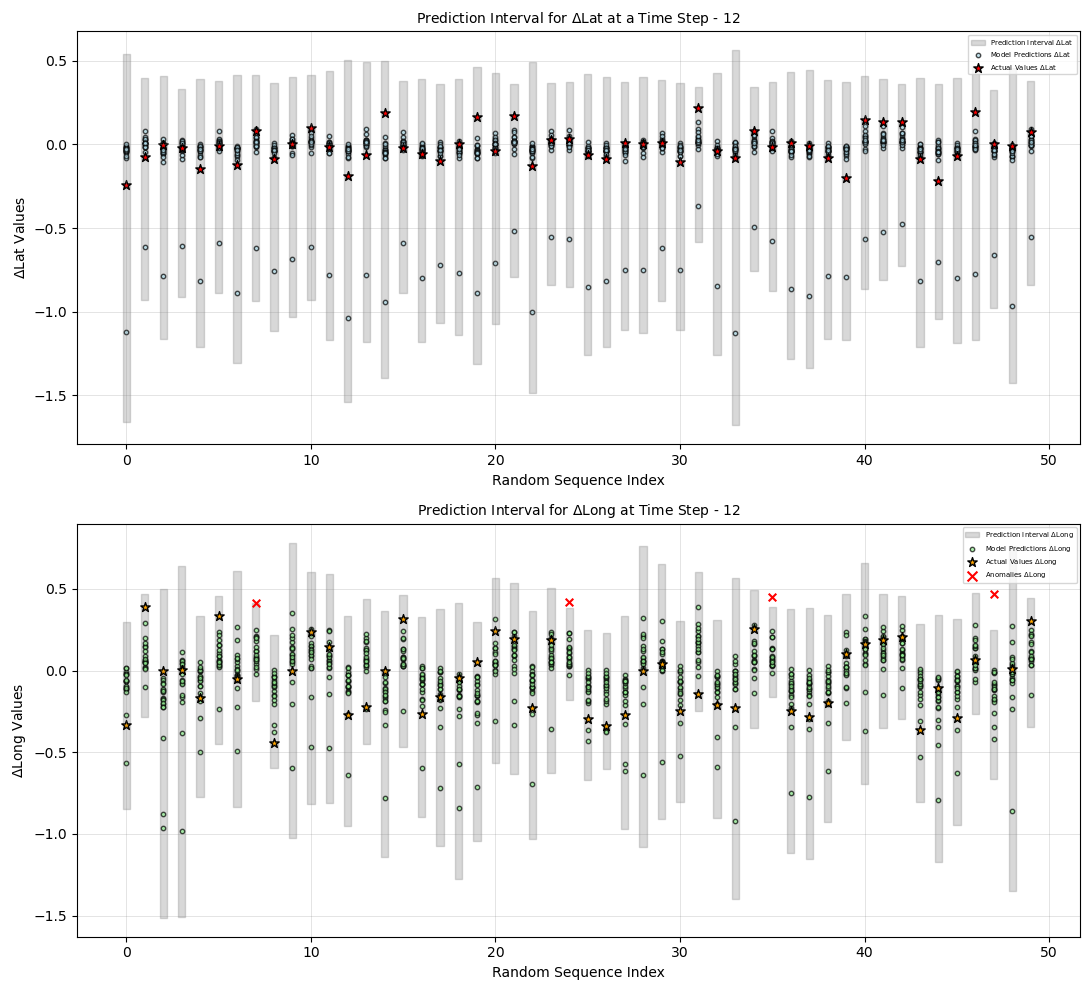

In [165]:
import random

def visualize_random_time_step_dLat_dLong(num_random_sequences, sample_size, modelSeq, y_test_inv):
    """ 
    Visualize prediction intervals, model predictions, and actuals for dLat and dLong 
    for a randomly selected time step across randomly selected sequences. 

    Parameters: 
    - num_random_sequences: Number of random sequences to visualize 
    - sample_size: Number of models 
    - modelSeq: Dictionary containing model predictions for each sequence and time step 
    - y_test_inv: List of actual values for each sequence and time step 
    """ 

    # Randomly select a time step
   # num_time_steps = len(y_test_inv[0])  # Total number of time steps
    #target_time_step = 5 #random.randint(0, num_time_steps - 1)  # Randomly select a time step
    #print(f"Randomly selected time step: {target_time_step + 1}") 

    # Randomly select sequences
    random_sequences = random.sample(range(len(y_test_inv)), num_random_sequences) 
    print(f"Randomly selected sequences: {random_sequences}") 

    # Initialize containers for visualization
    prediction_intervals_dLat = []  # Prediction intervals for ΔLat
    model_predictions_dLat = []  # Model predictions for ΔLat
    actual_values_dLat = []  # Actual values for ΔLat

    prediction_intervals_dLong = []  # Prediction intervals for ΔLong
    model_predictions_dLong = []  # Model predictions for ΔLong
    actual_values_dLong = []  # Actual values for ΔLong

    # Gather data for the selected random sequences and time step
    for seq in random_sequences: 
        preds_dLat = [] 
        preds_dLong = [] 

        for model_path in model_paths: 
            pred_dLat, pred_dLong = modelSeq[model_path][seq][target_time_step]  # Get predictions for target time step
            preds_dLat.append(pred_dLat) 
            preds_dLong.append(pred_dLong) 

        # Calculate prediction intervals for ΔLat
        variance_dLat = np.var(preds_dLat) 
        lower_bound_dLat = np.min([calculate_prediction_interval(p, variance_dLat, sample_size)[0] for p in preds_dLat]) 
        upper_bound_dLat = np.max([calculate_prediction_interval(p, variance_dLat, sample_size)[1] for p in preds_dLat]) 
        prediction_intervals_dLat.append((lower_bound_dLat, upper_bound_dLat)) 

        # Calculate prediction intervals for ΔLong
        variance_dLong = np.var(preds_dLong) 
        lower_bound_dLong = np.min([calculate_prediction_interval(p, variance_dLong, sample_size)[0] for p in preds_dLong]) 
        upper_bound_dLong = np.max([calculate_prediction_interval(p, variance_dLong, sample_size)[1] for p in preds_dLong]) 
        prediction_intervals_dLong.append((lower_bound_dLong, upper_bound_dLong)) 

        # Store model predictions and actual values for ΔLat and ΔLong
        model_predictions_dLat.append(preds_dLat) 
        model_predictions_dLong.append(preds_dLong) 
        actual_values_dLat.append(y_test_inv[seq][target_time_step][0])  # ΔLat actual value
        actual_values_dLong.append(y_test_inv[seq][target_time_step][1])  # ΔLong actual value

    # Create subplots for dLat and dLong visualizations side by side
    #fig, axs = plt.subplots(1, 2, figsize=(20, 5))
    fig, axs = plt.subplots(2, 1, figsize=(11, 10))
    
    # Plot ΔLat visualization
    axs[0].grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.3)
    
    for i, (lower, upper) in enumerate(prediction_intervals_dLat): 
        axs[0].fill_between([i - 0.2, i + 0.2], [lower], [upper], color="gray", alpha=0.3, label=r"Prediction Interval $\Delta$Lat " if i == 0 else "") 

    for i, preds in enumerate(model_predictions_dLat): 
        axs[0].scatter([i] * len(preds), preds, alpha=0.7, label=r"Model Predictions $\Delta$Lat" if i == 0 else "", edgecolors="black", color="lightblue", s=10) 

    anomalies_plotted = False
    for i, actual in enumerate(actual_values_dLat): 
        marker_style = "x" if actual < prediction_intervals_dLat[i][0] or actual > prediction_intervals_dLat[i][1] else "*"
        color_style = "black" if marker_style == "x" else "red"
        if marker_style == "x":
            axs[0].scatter([i], [actual], marker=marker_style, color=color_style, s=30)
            if not anomalies_plotted:
                axs[0].scatter([], [], marker="x", color="red", s=50, label=r"Anomalies $\Delta$Lat")
                anomalies_plotted = True
        else:
            axs[0].scatter([i], [actual], marker=marker_style, color=color_style, s=50, label=r"Actual Values $\Delta$Lat" if i == 0 else "", edgecolors="black")

    axs[0].set_title(rf"Prediction Interval for $\Delta$Lat at a Time Step - {target_time_step + 1}", fontsize=10) 
    axs[0].set_xlabel("Random Sequence Index", fontsize=10) 
    axs[0].set_ylabel(r"$\Delta$Lat Values", fontsize=10) 
    axs[0].legend(loc="upper right", fontsize=5) 

    # Plot ΔLong visualization
    axs[1].grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.3)
    
    for i, (lower, upper) in enumerate(prediction_intervals_dLong): 
        axs[1].fill_between([i - 0.2, i + 0.2], [lower], [upper], color="gray", alpha=0.3, label=r"Prediction Interval $\Delta$Long" if i == 0 else "") 

    for i, preds in enumerate(model_predictions_dLong): 
        axs[1].scatter([i] * len(preds), preds, alpha=0.7, label=r"Model Predictions $\Delta$Long" if i == 0 else "", edgecolors="black", color="lightgreen", s=10) 

    anomalies_plotted = False
    for i, actual in enumerate(actual_values_dLong): 
        marker_style = "x" if actual < prediction_intervals_dLong[i][0] or actual > prediction_intervals_dLong[i][1] else "*"
        color_style = "red" if marker_style == "x" else "orange"
        if marker_style == "x":
            axs[1].scatter([i], [actual], marker=marker_style, color=color_style, s=30)
            if not anomalies_plotted:
                axs[1].scatter([], [], marker="x", color="red", s=50, label=r"Anomalies $\Delta$Long")
                anomalies_plotted = True
        else:
            axs[1].scatter([i], [actual], marker=marker_style, color=color_style, s=50, label=r"Actual Values $\Delta$Long" if i == 0 else "", edgecolors="black")

    axs[1].set_title(rf"Prediction Interval for $\Delta$Long at Time Step - {target_time_step + 1}", fontsize=10) 
    axs[1].set_xlabel("Random Sequence Index", fontsize=10) 
    axs[1].set_ylabel(r"$\Delta$Long Values", fontsize=10) 
    axs[1].legend(loc="upper right", fontsize=5) 

    plt.tight_layout() 
    plt.show() 

target_time_step = 11 #random.randint(0, num_time_steps - 1)  # Randomly select a time step
print(f"Randomly selected time step: {target_time_step + 1}")
# Example: Visualize for 100 random sequences with the same random time step for both ΔLat and ΔLong
num_random_sequences = 50  #
visualize_random_time_step_dLat_dLong(num_random_sequences, sample_size, modelSeq, y_test_inv)



#### EPR

In [167]:
from scipy.spatial import ConvexHull
from scipy.stats import chi2
from shapely.geometry import Point, Polygon
from scipy.spatial import Delaunay

def calculate_epr(points, center):
    # Compute the Convex Hull of the points
    hull = ConvexHull(points)
    hull_vertices = points[hull.vertices]
    
    # Compute eigenvalues and eigenvectors of the Convex Hull vertices
    eig_val, eig_vec = np.linalg.eigh(np.cov(hull_vertices.T))
    
    # Set the confidence level for the EPR
    confidence_level = 0.95
    
    # Compute the radii of the EPR ellipsoid
    radii = np.sqrt(chi2.ppf(confidence_level, 2)) * np.sqrt(eig_val)
    
    # Generate an array of angles from 0 to 2π
    angles = np.linspace(0, 2 * np.pi, 100)
    
    # Compute points on the surface of the ellipsoid
    ellipsoid_points = np.vstack((radii[0] * np.cos(angles), radii[1] * np.sin(angles)))
    
    # Rotate the points by the eigenvectors
    ellipsoid_points = eig_vec.dot(ellipsoid_points).T
    
    # Create the EPR polygon
    epr = Polygon(ellipsoid_points + center)
    
    return epr, ellipsoid_points + center

def get_average_center(lst):
    if len(lst) == 0:
        return None  # Empty list case
    return sum(lst) / len(lst)

def regionCheck(ellipsoid_points, actual_point_2d, string):
    # Create the convex hull using scipy's ConvexHull
    hull = ConvexHull(ellipsoid_points)

    # Create a Delaunay triangulation from the hull points
    hull_delaunay = Delaunay(ellipsoid_points[hull.vertices])

    # Check if the actual_point_2d lies inside the convex hull
    is_inside = hull_delaunay.find_simplex(actual_point_2d) >= 0

    print(f"{string}: The point is inside the ellipsoid region: {is_inside[0]}")

    return is_inside


def elipseGraph(predicted_values, actual_values, epr_points, center_predicted):
    # Plotting
    plt.figure(figsize=(10, 6))

    # Plot predicted values
    plt.scatter(predicted_values[:, 0], predicted_values[:, 1], color='blue', label='Predicted Values')

    # Plot actual values
    plt.scatter(actual_values[:, 0], actual_values[:, 1], color='red', label='Actual Values')

    # Plot EPR ellipsoid
    plt.plot(epr_points[:, 0], epr_points[:, 1], color='green', label='EPR Ellipsoid')

    # Plot center of predicted values
    plt.scatter(center_predicted[0], center_predicted[1], color='black', marker='x', label='Center of Predicted Values')

    plt.xlabel('Latitude')
    plt.ylabel('Longitude')
    plt.title('EPR Ellipsoid with Predicted and Actual Values')
    plt.legend()
    plt.grid(True)
    plt.show()

tempStopSeq = 10
epr_dLat_dLong_Seq = {}
trueCount_RegionCheck_dLat_dLong = 0
falseCount_RegionCheck_dLat_dLong = 0
seqData = {}

# Loop over all sequences
# for seqNo in range(0, tempStopSeq):
for seqNo in range(len(y_pred_inv_list)): 
    print(f"\nEPR Calculation for Sequence {seqNo+1}")

    modelPreds_dLat_dLong = []

    # Get Actual
    actual_dLat_dLong = y_test_inv[seqNo][-1]
    actual_dLat_dLong = np.array([actual_dLat_dLong])

    # Loop over all Models Predictions
    for model_path in model_paths:
        # print(f"\nLoading model from {model_path}")
        lastPt = modelSeq[model_path][seqNo][-1] # Get Last Predicted dLat, dLong
        lastPT_dLat, lastPT_dLong = lastPt
        # print(f"Last Predicted dLat: {lastPT_dLat}, dLong: {lastPT_dLong}")

        # Store Predicted dLat, dLong for EPR Calc.
        modelPreds_dLat_dLong.append(lastPt)


    modelPreds_dLat_dLong = np.array(modelPreds_dLat_dLong)

    # Calculate the center of predicted values
    center_dLat_dLong = np.mean(modelPreds_dLat_dLong, axis=0)

    # Calculate EPR
    epr_polygon, ellipsoid_points = calculate_epr(modelPreds_dLat_dLong, center_dLat_dLong)

    # Check if Actual Lies in Ellipsoid Region
    regionCheck_dLat_dLong = regionCheck(ellipsoid_points, actual_dLat_dLong, 'dLat_dLong')

    epr_dLat_dLong_Seq[seqNo+1] = epr_polygon, regionCheck_dLat_dLong

    if regionCheck_dLat_dLong == True:
        trueCount_RegionCheck_dLat_dLong +=1
    else:
        falseCount_RegionCheck_dLat_dLong +=1

    seqData[seqNo+1] = modelPreds_dLat_dLong, actual_dLat_dLong, ellipsoid_points, center_dLat_dLong

acc_EPR = trueCount_RegionCheck_dLat_dLong/len(y_pred_inv_list)


EPR Calculation for Sequence 1
dLat_dLong: The point is inside the ellipsoid region: True

EPR Calculation for Sequence 2
dLat_dLong: The point is inside the ellipsoid region: True

EPR Calculation for Sequence 3
dLat_dLong: The point is inside the ellipsoid region: True

EPR Calculation for Sequence 4
dLat_dLong: The point is inside the ellipsoid region: True

EPR Calculation for Sequence 5
dLat_dLong: The point is inside the ellipsoid region: True

EPR Calculation for Sequence 6
dLat_dLong: The point is inside the ellipsoid region: False

EPR Calculation for Sequence 7
dLat_dLong: The point is inside the ellipsoid region: True

EPR Calculation for Sequence 8
dLat_dLong: The point is inside the ellipsoid region: True

EPR Calculation for Sequence 9
dLat_dLong: The point is inside the ellipsoid region: True

EPR Calculation for Sequence 10
dLat_dLong: The point is inside the ellipsoid region: True

EPR Calculation for Sequence 11
dLat_dLong: The point is inside the ellipsoid region: T

Inside scenarios: [1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 41, 42, 43, 45, 46, 47, 49, 50, 51, 52, 54, 55, 56, 57, 58, 59, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 120, 121, 122, 123, 124, 125, 126, 127, 129, 130, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 160, 161, 163, 164, 165, 166, 168, 169, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 207, 208, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239

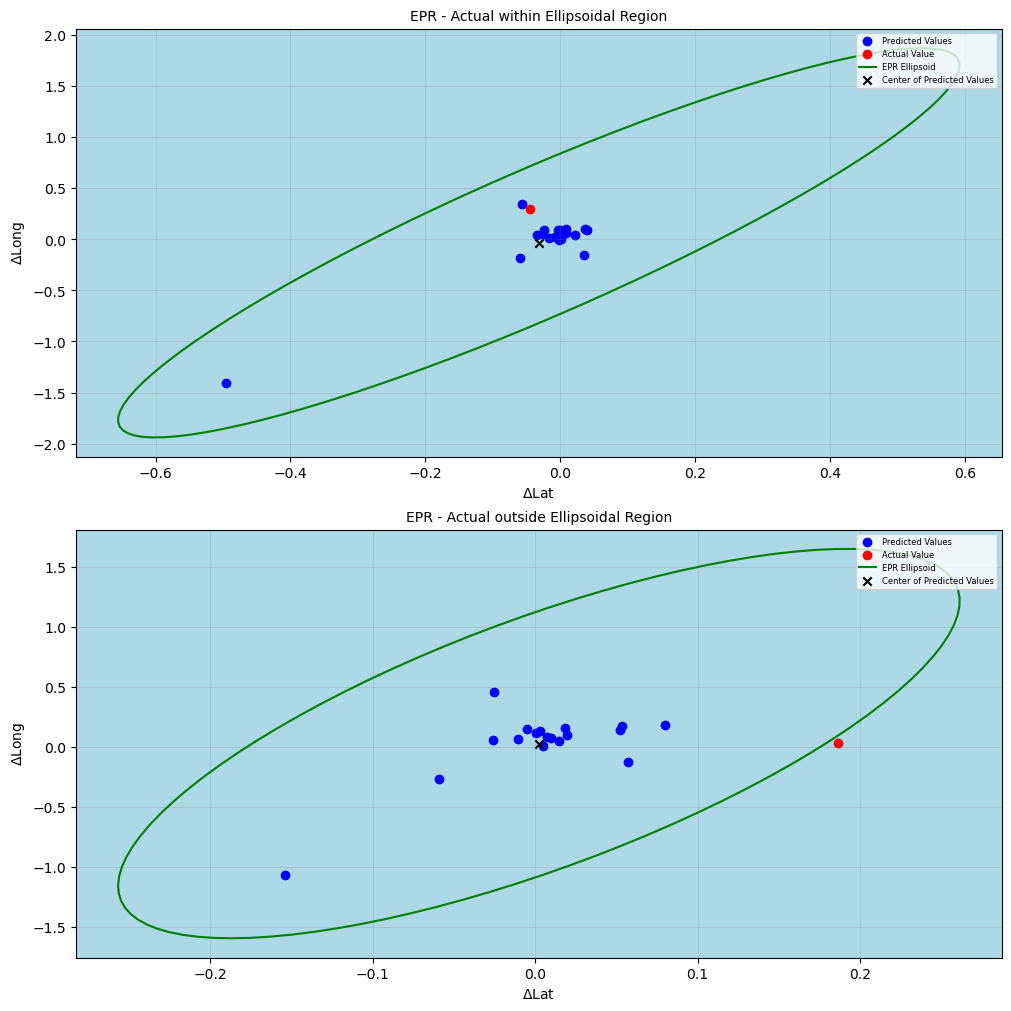

In [171]:
def visualize_single_sequence(seqData, epr_dLat_dLong_Seq):
    # Filter sequences
    inside_scenarios = [seqNo for seqNo, data in epr_dLat_dLong_Seq.items() if data[1]]
    outside_scenarios = [seqNo for seqNo, data in epr_dLat_dLong_Seq.items() if not data[1]]

    # Debug: Check available scenarios
    print(f"Inside scenarios: {inside_scenarios}")
    print(f"Outside scenarios: {outside_scenarios}")

    # Ensure both scenarios exist
    if not inside_scenarios or not outside_scenarios:
        print("Error: Both inside and outside scenarios must exist to create a comparison.")
        return

    # Randomly pick one sequence for each case
    random_inside_seq = np.random.choice(inside_scenarios)
    random_outside_seq = np.random.choice(outside_scenarios)

    print(f"Selected inside sequence: {random_inside_seq}")
    print(f"Selected outside sequence: {random_outside_seq}")

    # Create a figure with two subplots
    fig, axes = plt.subplots(2, 1, figsize=(10, 10), constrained_layout=True)

    # Plot inside scenario
    visualize_scenario_subplot(seqData, random_inside_seq, "EPR - Actual within Ellipsoidal Region", axes[0])

    # Plot outside scenario
    visualize_scenario_subplot(seqData, random_outside_seq, "EPR - Actual outside Ellipsoidal Region", axes[1])

    # Add a global title
    #plt.suptitle("EPR Anomaly Analysis for Single Sequence", fontsize=16)
    plt.show()

def visualize_scenario_subplot(seqData, seqNo, title, ax):
    # Extract data for the selected sequence
    try:
        predicted_values, actual_values, epr_points, center_predicted = seqData[seqNo]
    except KeyError:
        print(f"Error: Sequence {seqNo} not found in seqData.")
        return

    # Debug: Check extracted data
    #print(f"Predicted values for sequence {seqNo}: {predicted_values}")
    print(f"Actual value for sequence {seqNo}: {actual_values}")
   # print(f"EPR points for sequence {seqNo}: {epr_points}")
    print(f"Center of predicted values for sequence {seqNo}: {center_predicted}")

    # Plot predicted values
    ax.scatter(predicted_values[:, 0], predicted_values[:, 1], color='blue', label='Predicted Values')

    # Plot actual value
    ax.scatter(actual_values[0, 0], actual_values[0, 1], color='red', label='Actual Value', zorder=5)

    # Plot EPR ellipsoid
    ax.plot(epr_points[:, 0], epr_points[:, 1], color='green', label='EPR Ellipsoid')

    # Plot center of predicted values
    ax.scatter(center_predicted[0], center_predicted[1], color='black', marker='x', label='Center of Predicted Values')

    # Add labels and title
    ax.set_xlabel(r'$\Delta$Lat')
    ax.set_ylabel(r'$\Delta$Long')
    ax.set_title(title, fontsize=10)
    ax.set_facecolor('lightblue')
    ax.legend(loc="upper right", fontsize=6)
    ax.grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.3)

# Call the function to visualize a single sequence for inside and outside cases
visualize_single_sequence(seqData, epr_dLat_dLong_Seq)


In [173]:
#check overall coverage
acc_EPR

0.916761317540159

In [174]:
# Function to calculate Euclidean distances for each step in each sample
def calculate_euclidean_distances(predictions, actuals):
    distances = np.sqrt(np.sum((predictions - actuals) ** 2, axis=-1))
    return distances

tempStopSeq = 50
pointTotal = 20

seqData = {}
seqActuals = []

# Loop over all sequences
# for seqNo in range(0, tempStopSeq): # o Run for Specified Sequences
for seqNo in range(len(y_pred_inv_list)): # to Run for All Sequences
    # print(f"\nCPR Calculation for Sequence {seqNo+1}")

    modelPreds = {}
    modelPreds_dLat_dLong = []
    modelCount = 0

    # Get Actual
    actualPoint = y_test_inv[seqNo][-pointTotal:]
    # actualPoint = np.array([actualPoint])

    # Loop over all Models Predictions
    for model_path in model_paths:
        # print(f"\nLoading model from {model_path}")
        lastPt = modelSeq[model_path][seqNo][-pointTotal:] # Get Specified Predicted dLat, dLong

        modelPreds[modelCount] = lastPt

        # Store Predicted dLat, dLong for EPR Calc.
        modelPreds_dLat_dLong.append(lastPt)

        modelCount+=1

    modelPreds_dLat_dLong = np.array(modelPreds_dLat_dLong)
    
    seqActuals.append(actualPoint)

    seqData[seqNo] = modelPreds

seqActuals = np.array(seqActuals)

#### CPR

In [178]:
modelThresholds = []
for modelNo in range(0, 18):  # Adjusted to stop at the exact model you have (18 models)
    print(f"\nCalculation for Model {modelNo+1}")
    modelPredAcrossSeq = []
    # for seqNo in range(0, tempStopSeq): # to Run for Specified Sequences - to test 
    for seqNo in range(len(y_pred_inv_list)):  # to Run for All Sequences - to test
        # print(seqNo)
        modelPredAcrossSeq.append(seqData[seqNo][modelNo])

    # Split the test set by 50% to form the calibration set
    seqMid = int(len(modelPredAcrossSeq) / 2)
    modelPredAcrossSeq = np.array(modelPredAcrossSeq)
    calibration_set_predictions_model = modelPredAcrossSeq[:seqMid]
    calibration_set_actuals = seqActuals[:seqMid]

    # Remaining data for new predictions and actuals
    new_prediction_model = modelPredAcrossSeq[seqMid:]
    new_actual = seqActuals[seqMid:]

    # Compute nonconformity scores across all samples and steps
    nonconformity_scores_model = calculate_euclidean_distances(calibration_set_predictions_model.astype(float), calibration_set_actuals.astype(float))

    alpha = 0.05
    # Calculate stepwise thresholds across samples for each step
    thresholds_stepwise_model = np.quantile(nonconformity_scores_model, 1 - alpha, axis=0)

    # Compute nonconformity scores for the new prediction against the new actual
    new_scores_model = calculate_euclidean_distances(new_prediction_model.reshape(seqMid, pointTotal, 2), new_actual.reshape(seqMid, pointTotal, 2)).flatten()

    # Comparing new prediction scores against the thresholds for each step
    is_within_threshold_model = new_scores_model.reshape(seqMid, pointTotal) <= thresholds_stepwise_model
    modelThresholds.append(is_within_threshold_model)
    # Calculate coverage probability 
    coverage_probability_model = np.mean(is_within_threshold_model)

    # Output the thresholds and whether the new scores are within these thresholds for each step
    print(f"Model {modelNo+1} Thresholds Stepwise:", thresholds_stepwise_model)
    print(f"Model {modelNo+1} Is Within Threshold:", is_within_threshold_model)
    print(f"Model {modelNo+1} New Scores:", new_scores_model.reshape(seqMid, pointTotal))
    print(f"Model {modelNo+1} Coverage Probability: {coverage_probability_model:.2f}")
    # break

# Sum each sub-array
sub_array_sums = [np.sum(sub_array) for sub_array in modelThresholds]
# Get size of each sub-array
sub_array_size = [sub_array.size for sub_array in modelThresholds]
# Calculate overall coverage probability across all models
overall_coverage_probability = np.sum(sub_array_sums) / np.sum(sub_array_size)
print(f"\nOverall Coverage Probability: {overall_coverage_probability:.4f}")


Calculation for Model 1
Model 1 Thresholds Stepwise: [0.39446974 0.40613051 0.41806294 0.42102515 0.41992924 0.41274044
 0.40169518 0.39174754 0.37940898 0.37116633 0.36859061 0.36534272
 0.36479528 0.36527799 0.36817157 0.37011468 0.37435606 0.38022923
 0.38304682 0.38219604]
Model 1 Is Within Threshold: [[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
Model 1 New Scores: [[0.33878203 0.38608749 0.41564519 ... 0.28973521 0.30048902 0.30602575]
 [0.22813159 0.1985692  0.187309   ... 0.26585878 0.2738817  0.26630096]
 [0.20180495 0.27638276 0.30585449 ... 0.20489497 0.2123303  0.28434909]
 ...
 [0.19670331 0.16234161 0.14804386 ... 0.22933406 0.23547259 0.22847872]
 [0.23133864 0.20006014 0.18550631 ... 0.25384224 0.25340245 0.24402356]
 [0.20455712 0.2638027  0.28507014 ...

In [177]:
def calculate_euclidean_distances(predictions,actuals):
    distances=np.sqrt(np.sum((predictions-actuals)**2,axis=-1))
    return distances

#Assuming y_pred_inv_list,y_test_inv,model_paths,and modelSeq are predefined
#tempStopSeq=50  # to limit the number of sequences - to test 
pointTotal=20
seqData={}
seqActuals=[]
#Loop over all sequences
#for seqNo in range(0,tempStopSeq):  #for specified sequences


for seqNo in range(len(y_pred_inv_list)):  #to run for all sequences
    modelPreds={}
    modelCount=0
    #Get Actual
    actualPoint=y_test_inv[seqNo][-pointTotal:]
    #Loop over all Models' Predictions
    for model_path in model_paths:
        lastPt=modelSeq[model_path][seqNo][-pointTotal:]  #Get specified predicted dLat,dLong
        modelPreds[modelCount]=lastPt
        modelCount+=1
    seqActuals.append(actualPoint)
    seqData[seqNo]=modelPreds
seqActuals=np.array(seqActuals)
modelThresholds=[]
#Loop over all models


for modelNo in range(len(model_paths)):
    print(f"\nCalculation for Model {modelNo+1}")
    modelPredAcrossSeq=[]
    #Collect predictions for the current model across all sequences
    for seqNo in range(len(y_pred_inv_list)):
        modelPredAcrossSeq.append(seqData[seqNo][modelNo])

    #Split the test set by 50% to form the calibration set
    seqMid=len(modelPredAcrossSeq)//2
    modelPredAcrossSeq=np.array(modelPredAcrossSeq)
    calibration_set_predictions_model=modelPredAcrossSeq[:seqMid]
    calibration_set_actuals=seqActuals[:seqMid]

    #Remaining data for new predictions and actuals
    new_prediction_model=modelPredAcrossSeq[seqMid:]
    new_actual=seqActuals[seqMid:]

    #Compute nonconformity scores across all samples and steps
    nonconformity_scores_model=calculate_euclidean_distances(
        calibration_set_predictions_model.astype(float),
        calibration_set_actuals.astype(float)
    )
    alpha=0.05
    #Calculate stepwise thresholds across samples for each step
    thresholds_stepwise_model=np.quantile(nonconformity_scores_model,1-alpha,axis=0)
    #Compute nonconformity scores for the new prediction against the new actual
    new_scores_model=calculate_euclidean_distances(
        new_prediction_model.reshape(-1,pointTotal,2),
        new_actual.reshape(-1,pointTotal,2)
    ).flatten()

    #Comparing new prediction scores against the thresholds for each step
    is_within_threshold_model=new_scores_model.reshape(-1,pointTotal)<=thresholds_stepwise_model
    modelThresholds.append(is_within_threshold_model)
    
    #Calculate coverage probability for the current model
    coverage_probability_model=np.mean(is_within_threshold_model)
    #Output the thresholds and coverage probability for the current model
    print(f"Model {modelNo+1} Thresholds Stepwise:",thresholds_stepwise_model)
    print(f"Model {modelNo+1} Coverage Probability: {coverage_probability_model:.2f}")


#Convert modelThresholds to a NumPy array for easier manipulation
modelThresholds=np.array(modelThresholds)
#Calculate coverage probability for each time step across all sequences and models
time_step_coverage=np.mean(modelThresholds,axis=(0,1))


for t in range(pointTotal):
    print(f"Time Step {t+1}: Coverage Probability = {time_step_coverage[t]*100:.2f}%")
#Calculate overall coverage probability across all models, sequences, and time steps
overall_coverage_probability=np.mean(modelThresholds)
print(f"\nOverall Coverage Probability: {overall_coverage_probability*100:.2f}%")



Calculation for Model 1
Model 1 Thresholds Stepwise: [0.39446974 0.40613051 0.41806294 0.42102515 0.41992924 0.41274044
 0.40169518 0.39174754 0.37940898 0.37116633 0.36859061 0.36534272
 0.36479528 0.36527799 0.36817157 0.37011468 0.37435606 0.38022923
 0.38304682 0.38219604]
Model 1 Coverage Probability: 0.95

Calculation for Model 2
Model 2 Thresholds Stepwise: [0.42281735 0.41820778 0.41316602 0.40634606 0.40215941 0.40019058
 0.39487892 0.39449346 0.39200836 0.3915642  0.3895915  0.38934118
 0.38860592 0.3903796  0.3924492  0.39636807 0.40080544 0.41139342
 0.42987274 0.47956922]
Model 2 Coverage Probability: 0.95

Calculation for Model 3
Model 3 Thresholds Stepwise: [0.32526722 0.32628948 0.32440011 0.32364789 0.32327883 0.32334062
 0.32445233 0.32647206 0.32898036 0.33375071 0.33570812 0.33929711
 0.34073241 0.34494155 0.34663066 0.34696723 0.34716478 0.34930912
 0.35977601 0.3828103 ]
Model 3 Coverage Probability: 0.95

Calculation for Model 4
Model 4 Thresholds Stepwise: [0.3

#### CI

In [180]:
import numpy as np
import scipy.stats as stats
def calculate_confidence_interval(data,confidence_level=0.95):
    """Calculate the confidence interval for a given dataset."""
    n=len(data)
    mean_value=np.mean(data)
    std_dev=np.std(data,axis=0,ddof=1)  #Use ddof=1 for sample standard deviation
    se=std_dev/np.sqrt(n)  #Standard error
    t_score=stats.t.ppf((1+confidence_level)/2,n-1)  #Degrees of freedom=n-1
    #Compute the confidence interval bounds
    lower_bound=mean_value-t_score*se
    upper_bound=mean_value+t_score*se
    return lower_bound,upper_bound


#Initialize variables for anomaly detection and accuracy calculation
sequence_anomalies={}
time_step_accuracies_CI=[]
#Loop over all time steps
num_time_steps=len(y_test_inv[0])  #Total number of time steps


for time_step in range(num_time_steps):
    print(f"\nConfidence Interval Calculation for Time Step {time_step+1}")
    #Track anomalies and accuracy for this time step
    total_sequences=len(y_pred_inv_list)
    success_count_dLat=0
    success_count_dLong=0
    for seqNo in range(total_sequences):  #Loop over all sequences
        modelPreds_dLat=[]
        modelPreds_dLong=[]
        #Collect predictions from all models for this sequence and time step
        for model_path in model_paths:
            pred_dLat,pred_dLong=modelSeq[model_path][seqNo][time_step]
            modelPreds_dLat.append(pred_dLat)
            modelPreds_dLong.append(pred_dLong)
        #Calculate confidence intervals for dLat and dLong
        low_dLat,up_dLat=calculate_confidence_interval(modelPreds_dLat,confidence_level=0.95)
        low_dLong,up_dLong=calculate_confidence_interval(modelPreds_dLong,confidence_level=0.95)
        #Check if the actual values fall within the confidence intervals
        actual_dLat,actual_dLong=y_test_inv[seqNo][time_step]
        #dLat Accuracy Check
        if low_dLat<=actual_dLat<=up_dLat:
            success_count_dLat+=1
        #dLong Accuracy Check
        if low_dLong<=actual_dLong<=up_dLong:
            success_count_dLong+=1
    #Calculate accuracy percentages for this time step
    accuracy_dLat=(success_count_dLat/total_sequences)*100
    accuracy_dLong=(success_count_dLong/total_sequences)*100
    print(f"Time Step {time_step+1} - dLat Accuracy: {accuracy_dLat:.2f}%, dLong Accuracy: {accuracy_dLong:.2f}%")
    #Store accuracy for this time step
    time_step_accuracies_CI.append((accuracy_dLat,accuracy_dLong))




#Calculate overall accuracy across all time steps
overall_accuracy_dLat=sum(avg[0]for avg in time_step_accuracies_CI)/num_time_steps
overall_accuracy_dLong=sum(avg[1]for avg in time_step_accuracies_CI)/num_time_steps
print(f"\nOverall CI Accuracy for dLat Across All Time Steps: {overall_accuracy_dLat:.2f}%")
print(f"Overall CI Accuracy for dLong Across All Time Steps: {overall_accuracy_dLong:.2f}%")



Confidence Interval Calculation for Time Step 1
Time Step 1 - dLat Accuracy: 80.41%, dLong Accuracy: 52.18%

Confidence Interval Calculation for Time Step 2
Time Step 2 - dLat Accuracy: 78.75%, dLong Accuracy: 44.43%

Confidence Interval Calculation for Time Step 3
Time Step 3 - dLat Accuracy: 78.29%, dLong Accuracy: 39.84%

Confidence Interval Calculation for Time Step 4
Time Step 4 - dLat Accuracy: 77.95%, dLong Accuracy: 38.37%

Confidence Interval Calculation for Time Step 5
Time Step 5 - dLat Accuracy: 77.33%, dLong Accuracy: 36.98%

Confidence Interval Calculation for Time Step 6
Time Step 6 - dLat Accuracy: 76.46%, dLong Accuracy: 35.59%

Confidence Interval Calculation for Time Step 7
Time Step 7 - dLat Accuracy: 75.02%, dLong Accuracy: 33.79%

Confidence Interval Calculation for Time Step 8
Time Step 8 - dLat Accuracy: 73.03%, dLong Accuracy: 31.81%

Confidence Interval Calculation for Time Step 9
Time Step 9 - dLat Accuracy: 70.62%, dLong Accuracy: 30.00%

Confidence Interva

Randomly selected time step: 3
Randomly selected sequences: [3529, 10264, 11643, 571, 8245, 3372, 6709, 6086, 3267, 9422, 10659, 1361, 10718, 1137, 8461, 9877, 4014, 7696, 11543, 8779, 10782, 5244, 12150, 10789, 8400, 12062, 179, 1692, 5443, 10763, 10906, 12011, 9338, 1226, 12027, 8664, 10576, 5324, 9706, 6325, 5183, 8485, 8986, 4983, 9470, 3594, 9863, 3537, 832, 8160]


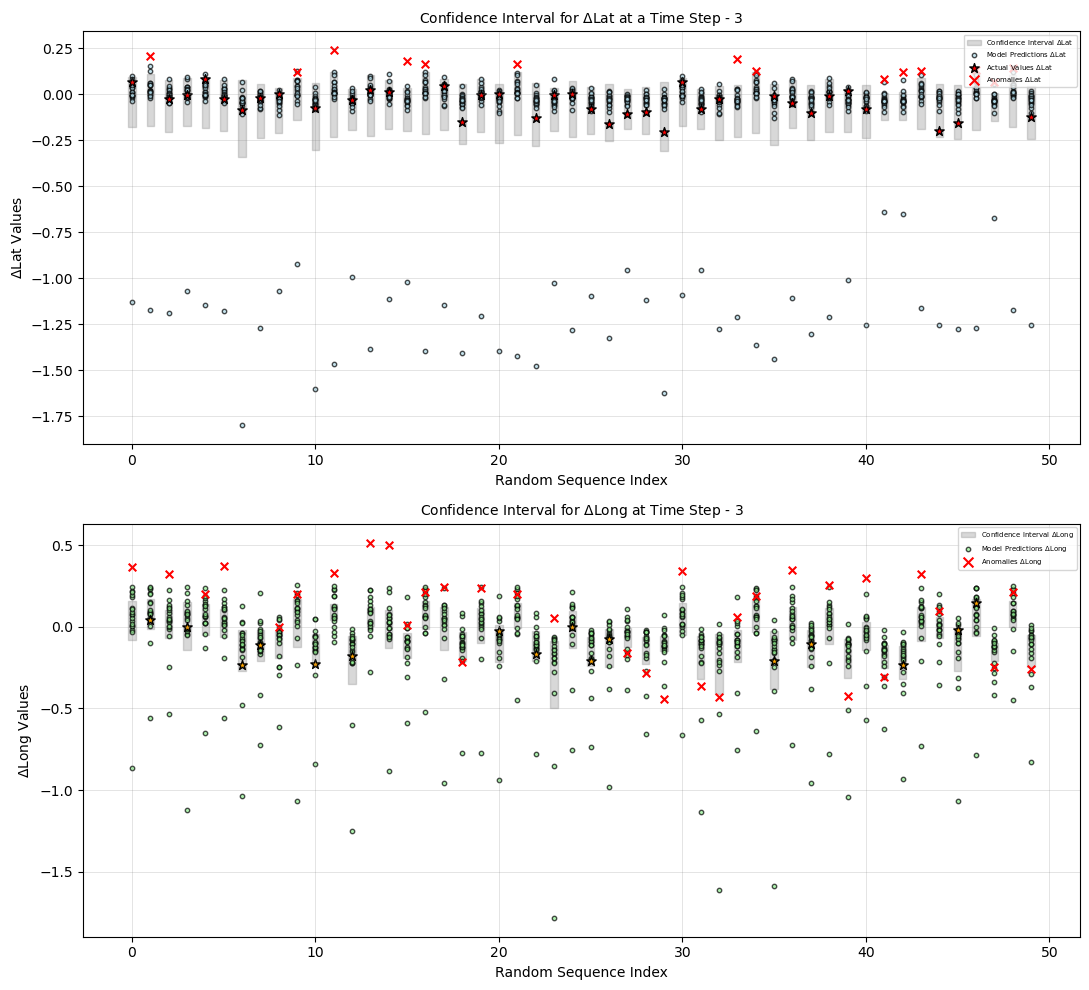

In [188]:
import random
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Function to calculate confidence intervals
def calculate_confidence_interval(data, confidence_level=0.95):
    """Calculate the confidence interval for a given dataset."""
    n = len(data)
    mean_value = np.mean(data)
    std_dev = np.std(data, axis=0, ddof=1)  # Use ddof=1 for sample standard deviation
    se = std_dev / np.sqrt(n)  # Standard error
    t_score = stats.t.ppf((1 + confidence_level) / 2, n - 1)  # Degrees of freedom = n - 1
    # Compute the confidence interval bounds
    lower_bound = mean_value - t_score * se
    upper_bound = mean_value + t_score * se
    return lower_bound, upper_bound

def visualize_random_time_step_dLat_dLong(num_random_sequences, modelSeq, y_test_inv, model_paths):
    """ 
    Visualize confidence intervals, model predictions, and actuals for dLat and dLong 
    for a randomly selected time step across randomly selected sequences. 

    Parameters: 
    - num_random_sequences: Number of random sequences to visualize 
    - modelSeq: Dictionary containing model predictions for each sequence and time step 
    - y_test_inv: List of actual values for each sequence and time step 
    - model_paths: List of model paths
    """ 
    num_time_steps = len(y_test_inv[0])  # Total number of time steps
    target_time_step = random.randint(0, num_time_steps - 1)  # Randomly select a time step
    print(f"Randomly selected time step: {target_time_step + 1}") 

    # Randomly select sequences
    random_sequences = random.sample(range(len(y_test_inv)), num_random_sequences) 
    print(f"Randomly selected sequences: {random_sequences}") 

    # Initialize containers for visualization
    confidence_intervals_dLat = []  # Confidence intervals for ΔLat
    model_predictions_dLat = []  # Model predictions for ΔLat
    actual_values_dLat = []  # Actual values for ΔLat

    confidence_intervals_dLong = []  # Confidence intervals for ΔLong
    model_predictions_dLong = []  # Model predictions for ΔLong
    actual_values_dLong = []  # Actual values for ΔLong

    # Gather data for the selected random sequences and time step
    for seq in random_sequences: 
        preds_dLat = [] 
        preds_dLong = [] 

        for model_path in model_paths: 
            pred_dLat, pred_dLong = modelSeq[model_path][seq][target_time_step]  # Get predictions for target time step
            preds_dLat.append(pred_dLat) 
            preds_dLong.append(pred_dLong) 

        # Calculate confidence intervals for ΔLat
        lower_bound_dLat, upper_bound_dLat = calculate_confidence_interval(preds_dLat, confidence_level=0.95)
        confidence_intervals_dLat.append((lower_bound_dLat, upper_bound_dLat)) 

        # Calculate confidence intervals for ΔLong
        lower_bound_dLong, upper_bound_dLong = calculate_confidence_interval(preds_dLong, confidence_level=0.95)
        confidence_intervals_dLong.append((lower_bound_dLong, upper_bound_dLong)) 

        # Store model predictions and actual values for ΔLat and ΔLong
        model_predictions_dLat.append(preds_dLat) 
        model_predictions_dLong.append(preds_dLong) 
        actual_values_dLat.append(y_test_inv[seq][target_time_step][0])  # ΔLat actual value
        actual_values_dLong.append(y_test_inv[seq][target_time_step][1])  # ΔLong actual value

    # Create subplots for dLat and dLong visualizations side by side
    fig, axs = plt.subplots(2, 1, figsize=(11, 10))
    
    # Plot ΔLat visualization
    axs[0].grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.3)
    
    for i, (lower, upper) in enumerate(confidence_intervals_dLat): 
        axs[0].fill_between([i - 0.2, i + 0.2], [lower], [upper], color="gray", alpha=0.3, label=r"Confidence Interval $\Delta$Lat " if i == 0 else "") 

    for i, preds in enumerate(model_predictions_dLat): 
        axs[0].scatter([i] * len(preds), preds, alpha=0.7, label=r"Model Predictions $\Delta$Lat" if i == 0 else "", edgecolors="black", color="lightblue", s=10) 

    anomalies_plotted = False
    for i, actual in enumerate(actual_values_dLat): 
        marker_style = "x" if actual < confidence_intervals_dLat[i][0] or actual > confidence_intervals_dLat[i][1] else "*"
        color_style = "red" if marker_style == "x" else "red"
        if marker_style == "x":
            axs[0].scatter([i], [actual], marker=marker_style, color=color_style, s=30)
            if not anomalies_plotted:
                axs[0].scatter([], [], marker="x", color="red", s=50, label=r"Anomalies $\Delta$Lat")
                anomalies_plotted = True
        else:
            axs[0].scatter([i], [actual], marker=marker_style, color=color_style, s=50, label=r"Actual Values $\Delta$Lat" if i == 0 else "", edgecolors="black")

    axs[0].set_title(rf"Confidence Interval for $\Delta$Lat at a Time Step - {target_time_step + 1}", fontsize=10) 
    axs[0].set_xlabel("Random Sequence Index", fontsize=10) 
    axs[0].set_ylabel(r"$\Delta$Lat Values", fontsize=10) 
    axs[0].legend(loc="upper right", fontsize=5) 

    # Plot ΔLong visualization
    axs[1].grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.3)
    
    for i, (lower, upper) in enumerate(confidence_intervals_dLong): 
        axs[1].fill_between([i - 0.2, i + 0.2], [lower], [upper], color="gray", alpha=0.3, label=r"Confidence Interval $\Delta$Long" if i == 0 else "") 

    for i, preds in enumerate(model_predictions_dLong): 
        axs[1].scatter([i] * len(preds), preds, alpha=0.7, label=r"Model Predictions $\Delta$Long" if i == 0 else "", edgecolors="black", color="lightgreen", s=10) 

    anomalies_plotted = False
    for i, actual in enumerate(actual_values_dLong): 
        marker_style = "x" if actual < confidence_intervals_dLong[i][0] or actual > confidence_intervals_dLong[i][1] else "*"
        color_style = "red" if marker_style == "x" else "orange"
        if marker_style == "x":
            axs[1].scatter([i], [actual], marker=marker_style, color=color_style, s=30)
            if not anomalies_plotted:
                axs[1].scatter([], [], marker="x", color="red", s=50, label=r"Anomalies $\Delta$Long")
                anomalies_plotted = True
        else:
            axs[1].scatter([i], [actual], marker=marker_style, color=color_style, s=50, label=r"Actual Values $\Delta$Long" if i == 0 else "", edgecolors="black")

    axs[1].set_title(rf"Confidence Interval for $\Delta$Long at Time Step - {target_time_step + 1}", fontsize=10) 
    axs[1].set_xlabel("Random Sequence Index", fontsize=10) 
    axs[1].set_ylabel(r"$\Delta$Long Values", fontsize=10) 
    axs[1].legend(loc="upper right", fontsize=5) 

    plt.tight_layout() 
    plt.show() 

# Example usage
num_random_sequences = 50
model_paths = list(modelSeq.keys())  # Assuming modelSeq is already defined
visualize_random_time_step_dLat_dLong(num_random_sequences, modelSeq, y_test_inv, model_paths)
